In [2]:
    import torch
    print(torch.__version__)

2.8.0+cpu


Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
YOLOv5  2025-8-19 Python-3.13.5 torch-2.8.0+cpu CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
image 1/1 C:\Users\lisan\Jupyter Notebook Projects\Recycling-YOLO\notebooks\zidane.jpg: 384x640 2 persons, 1 tie, 81.9ms
Speed: 4.9ms pre-process, 81.9ms inference, 35.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\smoke\infer_url


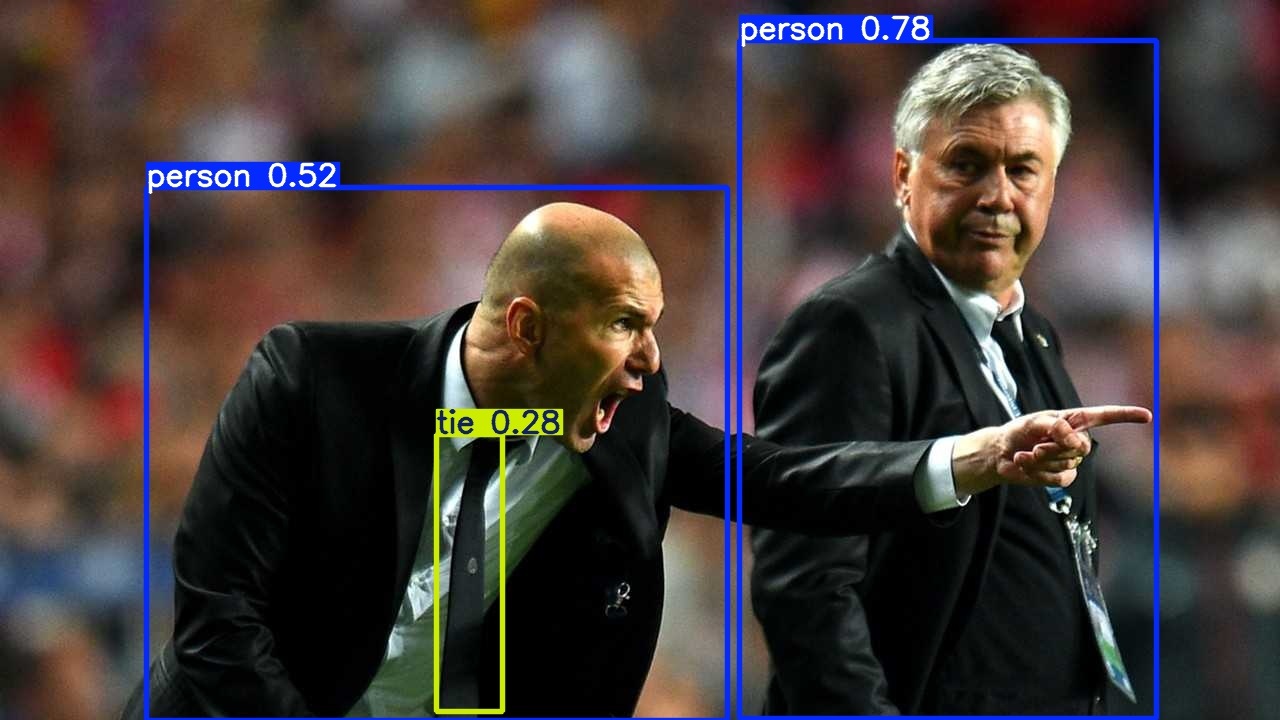

Saved to: runs\smoke\infer_url\zidane.jpg


In [19]:
import sys
import os
from pathlib import Path
import torch
from PIL import Image

# Check if yolov5 exists as a submodule and add it to path if needed
yolov5_path = Path("yolov5")  # Adjust this path to where your submodule is located
if not yolov5_path.exists():
    print(f"YOLOv5 submodule not found at {yolov5_path}. Attempting to clone it...")
    # Clone the repository if it doesn't exist
    !git clone https://github.com/ultralytics/yolov5.git
    
# Add yolov5 to the Python path
if yolov5_path.exists() and str(yolov5_path.resolve()) not in sys.path:
    sys.path.append(str(yolov5_path.resolve()))
    print(f"Added {yolov5_path.resolve()} to Python path")

# Install required dependencies for yolov5
!pip install -q -r yolov5/requirements.txt

# Now import from yolov5
from detect import run as yolo_detect

result = yolo_detect(
    weights="yolov5n.pt",
    source="https://ultralytics.com/images/zidane.jpg",
    imgsz=[640, 640],  # Changed from integer to list - YOLOv5 expects [height, width] or [size, size]
    conf_thres=0.25,
    device=0 if torch.cuda.is_available() else "cpu",
    project="runs/smoke",
    name="infer_url",
    exist_ok=True,
)

out_dir = Path("runs/smoke/infer_url")  # Match the name parameter from above
# pick the first image saved by detect.py
out_image_path = sorted(list(out_dir.glob("*.jpg")) + list(out_dir.glob("*.png")))[0]
display(Image.open(out_image_path))
print("Saved to:", out_image_path)